### Seaborn
다양한 기능, 통계적인 기능 matplotlib과 비슷

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [55]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [3]:
# 그래프에 마이너스 표시 나오게
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False

In [4]:
# 경고 표시 생략
import warnings
warnings.filterwarnings(action='ignore') 

#### barplot() : 카테고리 값에 따른 실수 값의 평균과 편차를 표시할 수 있는 차트
- 평균은 막대의 높이, 편차 에러바

In [7]:
import seaborn as sns

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [15]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


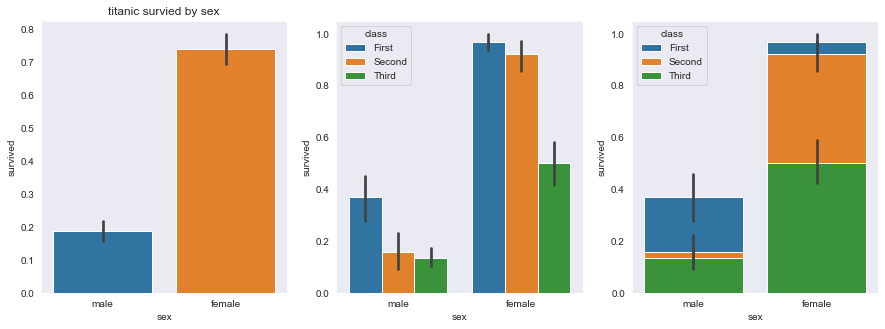

In [19]:
# barplot
# 스타일 테마를 설정 5가지 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('dark')

# 그래프 객체를 생성하기 위한 피겨객체 없애오기
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('titanic survied by sex')
area02 = fig.add_subplot(1,3,2)
area03 = fig.add_subplot(1,3,3)

# 성별에 따른 생존률
sns.barplot(x='sex' , y='survived' , data= titanic, ax=area01)

# hue = : groupby 역할
sns.barplot(x='sex' , y='survived' , hue='class', data= titanic, ax=area02)

# dodge : 누적 막대 바
sns.barplot(x='sex' , y='survived' , hue='class', data= titanic, dodge=False, ax=area03)

plt.show()

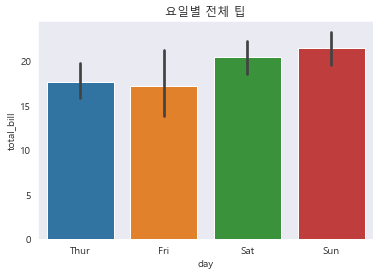

In [25]:
# tips barplot()
# 요일별 전체 팁을 시각화
sns.barplot(x='day', y='total_bill',data=tips)
plt.title('요일별 전체 팁')
plt.show()

#### countplot() : 카테고리별로 데이터 빈도를 표시하는 차트

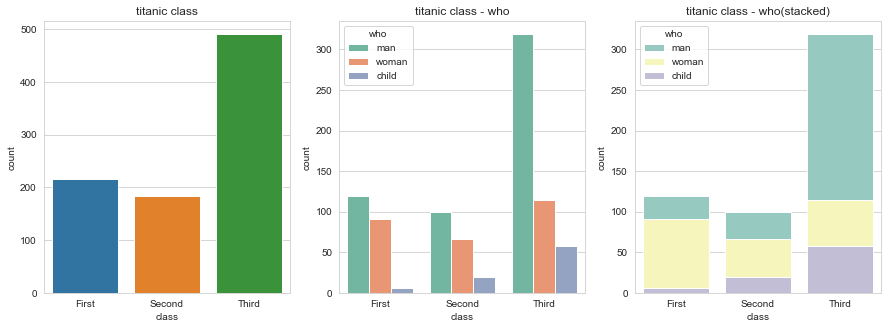

In [33]:
# countplot
# 스타일 테마를 설정 5가지 (darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체를 생성하기 위한 피겨 객체 
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('titanic class')
area02 = fig.add_subplot(1,3,2)
area02.set_title('titanic class - who')
area03 = fig.add_subplot(1,3,3)
area03.set_title('titanic class - who(stacked)')

# 성별에 따른 생존률
sns.countplot(x='class', data= titanic, ax=area01)

# hue = : groupby 역할
sns.countplot(x='class' , hue='who', palette='Set2',data= titanic, ax=area02)

# dodge : 누적 막대 바
sns.countplot(x='class' , hue='who', data= titanic, dodge=False, palette='Set3',ax=area03)

plt.show()

Text(0.5, 1.0, '요일별 팁')

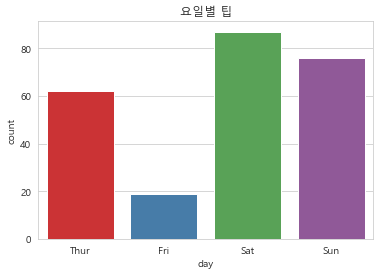

In [38]:
# tips를 이용한 countplot()
# 요일별로 팁을 준 빈도를 시각화 한다면?

sns.countplot(x='day',data=tips, palette='Set1')
plt.title('요일별 팁')

#### stripplot() : scatter plot 처럼 모든 데이터를 점으로 시각화
- jitter = True 설정하면 위치를 무작위로 바꿔서 겹치지 않게

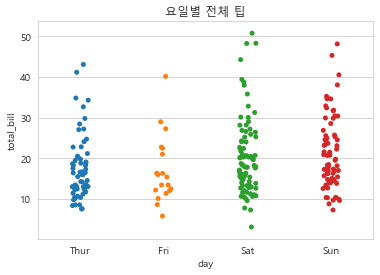

In [40]:
sns.stripplot(x='day', y='total_bill',data=tips, jitter=True)
plt.title('요일별 전체 팁')
plt.show()

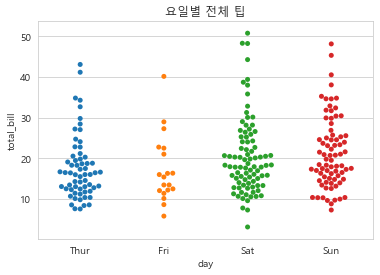

In [41]:
sns.swarmplot(x='day', y='total_bill',data=tips)
plt.title('요일별 전체 팁')
plt.show()

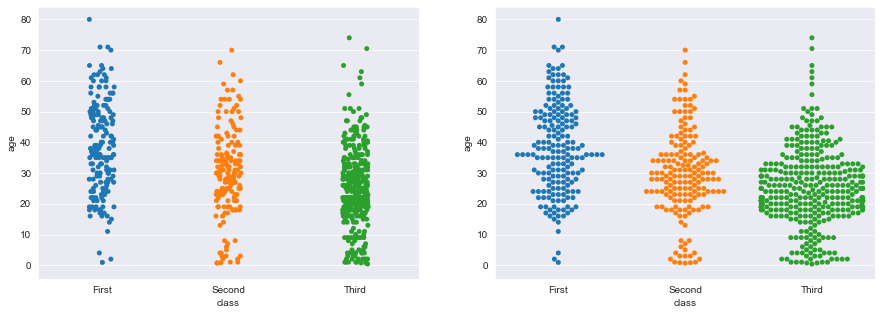

In [47]:
# 타이타닉 - 서브플롯 2개, class 별 나이의 분포 확인(stripplot(), swarmplot())
sns.set_style('darkgrid')
fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(1,2,1)
area02 = fig.add_subplot(1,2,2)

sns.stripplot(x='class', y='age', jitter=True, data=titanic, ax=area01)
sns.swarmplot(x='class', y='age', data=titanic, ax=area02)

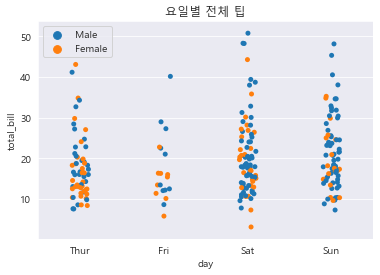

In [56]:
# tips 에서 요일별 성별 전체 팁 시각화
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips)
plt.title('요일별 전체 팁')
plt.legend(loc='best')
plt.show()

#### boxplot(), violinplot()

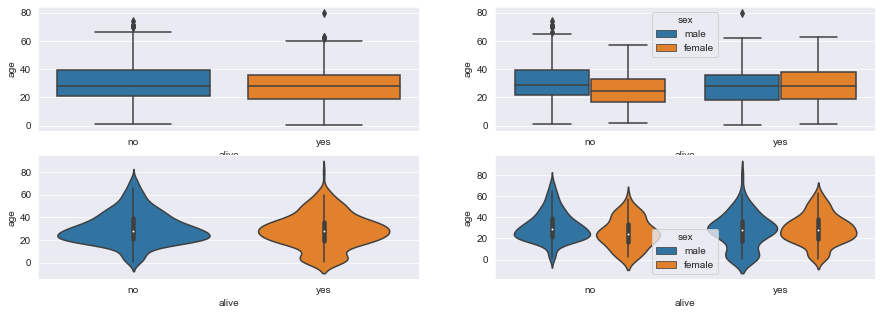

In [53]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))

area01 = fig.add_subplot(2,2,1)
area02 = fig.add_subplot(2,2,2)
area03 = fig.add_subplot(2,2,3)
area04 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive', y='age', data=titanic, ax=area01)
sns.boxplot(x='alive', y='age', data=titanic, hue= 'sex', ax=area02)

sns.violinplot(x='alive', y='age', data=titanic, ax=area03)
sns.violinplot(x='alive', y='age', data=titanic, hue= 'sex', ax=area04)

plt.show()

#### heatmap : 하나 이상의 카테고리 값의 변화를 색깔 변화로 시각화하는 차트

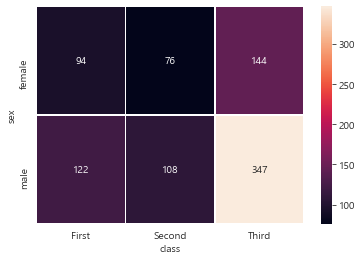

In [67]:
# titanic 피벗테이블로 번주형 변수를 각각 행, 열로 재구분하여 정리
# 인덱스 성별, 열 클래스
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table

sns.heatmap(table, annot=True, fmt='d', cbar=True, linewidth=0.9)
plt.show()

In [70]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


passengers                                                               \
month    January February March April  May June July August September October   
year                                                                            
1949         112      118   132   129  121  135  148    148       136     119   
1950         115      126   141   135  125  149  170    170       158     133   
1951         145      150   178   163  172  178  199    199       184     162   
1952         171      180   193   181  183  218  230    242       209     191   
1953         196      196   236   235  229  243  264    272       237     211   
1954         204      188   235   227  234  264  302    293       259     229   
1955         242      233   267   269  270  315  364    347       312     274   
1956         284      277   317   313  318  374  413    405       355     306   
1957         315      301   356   348  355  422  465    467       404     347   
1958         340      318   362   348  363  435  491    505       404     359   
1959         360      342   406   396  420  472  548    559       463     407   
1960         417      391   419   461  472  535  622    606       508     461   

                         
month November December  
year                     
1949       104      118  
1950       114      140  
1951       146      166  
1952       172      194  
1953       180      201  
1954       203      229  
1955       237      278  
1956       271      306  
1957       305      336  
1958       310      337  
1959       362      405  
1960       390      432

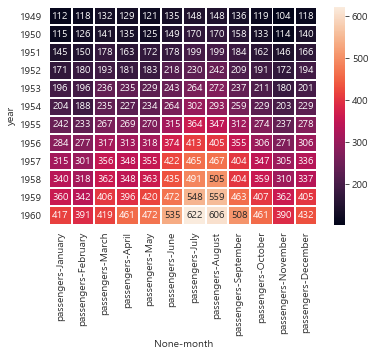

In [76]:
# flights 연도 월 별 승객 수 에 대한 히트맵 시각화
# table = flights.pivot_table(index=['year'], columns=['month'], aggfunc='sum')
table = flights.pivot_table(index=['month'], columns=['year'], 'passengers')
display(table)

sns.heatmap(table, annot=True, fmt='d',linewidth=0.9)
plt.show()